In [14]:
import geopandas as gpd
import os
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
map = gpd.read_file('~/Desktop/Project/milano1/NILZone_U00-32.shp')
immobiliare = gpd.read_file('~/Desktop/Project/dataImmobiliare.csv')

print(list(immobiliare.Zone))
print(list(map.NIL))

['Centro', 'Arco della Pace, Arena, Pagano', 'Genova, Ticinese', 'Quadronno, Palestro, Guastalla', 'Garibaldi, Moscova, Porta Nuova', 'Fiera, Sempione, City Life, Portello', 'Navigli', 'Porta Romana, Cadore, Montenero', 'Porta Venezia, Indipendenza', 'Centrale, Repubblica', 'Cenisio, Sarpi, Isola', 'Viale Certosa, Cascina Merlata', 'Bande Nere, Inganni', 'Famagosta, Barona', 'Abbiategrasso, Chiesa Rossa', 'Porta Vittoria, Lodi', 'Cimiano, Crescenzago, Adriano', 'Bicocca, Niguarda', 'Solari, Washington', 'Affori, Bovisa', 'San Siro, Trenno', 'Bisceglie, Baggio, Olmi', 'Ripamonti, Vigentino', 'Forlanini', 'Città Studi, Susa', 'Maggiolina, Istria', 'Precotto, Turro', 'Udine, Lambrate', 'Pasteur, Rovereto', 'Ponte Lambro, Santa Giulia', 'Corvetto, Rogoredo', 'Napoli, Soderini']
['SACCO', 'COMASINA', 'STEPHENSON', 'QT 8', 'ORTOMERCATO', 'MAGGIORE - MUSOCCO', 'PARCO LAMBRO - CIMIANO', 'GALLARATESE', 'S. SIRO', 'GHISOLFA', 'BAGGIO', 'QUARTO CAGNINO', 'LORENTEGGIO', 'GIAMBELLINO', 'S. CRISTOFO

In [16]:
big = {'SACCO':'Affori, Bovisa', 'COMASINA':'Affori, Bovisa', 'STEPHENSON':'Viale Certosa, Cascina Merlata', 'QT 8':'Fiera, Sempione, City Life, Portello', 
'ORTOMERCATO':'Porta Vittoria, Lodi', 'MAGGIORE - MUSOCCO':'Viale Certosa, Cascina Merlata', 'PARCO LAMBRO - CIMIANO':'Cimiano, Crescenzago, Adriano', 
'GALLARATESE':'San Siro, Trenno', 'S. SIRO':'San Siro, Trenno', 'GHISOLFA':'Viale Certosa, Cascina Merlata', 'BAGGIO':'Bisceglie, Baggio, Olmi', 
'QUARTO CAGNINO':'Bisceglie, Baggio, Olmi', 'LORENTEGGIO':'Famagosta, Barona', 'GIAMBELLINO':'Famagosta, Barona', 
'S. CRISTOFORO':'Famagosta, Barona', 'RONCHETTO SUL NAVIGLIO':'Famagosta, Barona', 
'TIBALDI':'Navigli', 'CASCINA TRIULZA - EXPO':'Viale Certosa, Cascina Merlata', 'QUARTO OGGIARO':'Affori, Bovisa', 
'AFFORI':'Affori, Bovisa', 'PADOVA':'Cimiano, Crescenzago, Adriano', 'EX OM - MORIVIONE':'Ripamonti, Vigentino', 'ADRIANO':'Cimiano, Crescenzago, Adriano', 
'FARINI':'Cenisio, Sarpi, Isola', 
'UMBRIA - MOLISE':'Porta Vittoria, Lodi', 'TRIULZO SUPERIORE':'Ponte Lambro, Santa Giulia', 'CORSICA':'Città Studi, Susa', "CITTA' STUDI": 'Città Studi, Susa', 'SELINUNTE':'San Siro, Trenno', 
"PARCO MONLUE' - PONTE LAMBRO": 'Ponte Lambro, Santa Giulia', 
"NIGUARDA - CA' GRANDA":'Bicocca, Niguarda', 'STADERA':'Abbiategrasso, Chiesa Rossa', 'GUASTALLA':'Quadronno, Palestro, Guastalla', 
'BRERA':'Centro', 'DUOMO':'Centro', 'SCALO ROMANA':'Corvetto, Rogoredo', 
'MAGENTA - S. VITTORE':'Genova, Ticinese', 'BOVISASCA':'Affori, Bovisa', 
'LODI - CORVETTO': 'Corvetto, Rogoredo', 'LAMBRATE':'Udine, Lambrate', 'BARONA':'Famagosta, Barona', 'BRUZZANO':'Bicocca, Niguarda', 'TRENNO':'San Siro, Trenno', 
'GRATOSOGLIO - TICINELLO':'Abbiategrasso, Chiesa Rossa', 'FIGINO':'San Siro, Trenno', 
'QUINTO ROMANO':'San Siro, Trenno', 
'PARCO AGRICOLO SUD':'Bisceglie, Baggio, Olmi', 'VILLAPIZZONE':'Viale Certosa, Cascina Merlata', 'BOVISA':'Affori, Bovisa', 'DERGANO':'Affori, Bovisa', 'PARCO NORD':'Bicocca, Niguarda', 
'BICOCCA':'Bicocca, Niguarda', 'MUGGIANO':'Bisceglie, Baggio, Olmi', 
'PORTELLO':'Fiera, Sempione, City Life, Portello', 'TRE TORRI': 'Fiera, Sempione, City Life, Portello', 
'PARCO SEMPIONE':'Fiera, Sempione, City Life, Portello', 'GIARDINI PORTA VENEZIA':'Porta Venezia, Indipendenza', 'TORTONA':'Solari, Washington', 
'NAVIGLI':'Navigli', 'XXII MARZO':'Porta Romana, Cadore, Montenero', 'BUENOS AIRES - VENEZIA':'Porta Venezia, Indipendenza', 'QUINTOSOLE':'Ripamonti, Vigentino', 
'RONCHETTO DELLE RANE':'Abbiategrasso, Chiesa Rossa', 'CHIARAVALLE':'Ripamonti, Vigentino', 'PARCO DELLE ABBAZIE':'Ripamonti, Vigentino', 'ROGOREDO':'Corvetto, Rogoredo', 'MECENATE':'Forlanini', 
'RIPAMONTI':'Ripamonti, Vigentino', 'VIALE MONZA':'Precotto, Turro', 'CENTRALE':'Centrale, Repubblica', 
'GRECO':'Bicocca, Niguarda', 'LORETO':'Centrale, Repubblica', 'PARCO FORLANINI - ORTICA':'Udine, Lambrate', 
'MACIACHINI - MAGGIOLINA':'Maggiolina, Istria', 'ISOLA':'Cenisio, Sarpi, Isola', 'SARPI':'Cenisio, Sarpi, Isola', 
'DE ANGELI - MONTE ROSA':'Solari, Washington', 
'WASHINGTON':'Solari, Washington', 'BANDE NERE':'Bande Nere, Inganni', 'FORZE ARMATE':'Bande Nere, Inganni', 'PARCO BOSCO IN CITT\x85':'San Siro, Trenno', 
'PORTA ROMANA': 'Porta Romana, Cadore, Montenero', 
'VIGENTINA': 'Navigli', 'TICINESE':'Navigli', 'CANTALUPA':'Famagosta, Barona', 
'PARCO DEI NAVIGLI':'Famagosta, Barona', 'PAGANO': 'Arco della Pace, Arena, Pagano', 'GARIBALDI REPUBBLICA': 'Garibaldi, Moscova, Porta Nuova'}

In [17]:
translation = pd.DataFrame(big.items(), columns=['NIL', 'Zone'])
immobiliare = pd.read_csv('~/Desktop/Project/dataImmobiliare.csv')

In [18]:
new = translation.merge(immobiliare)
new= new[['NIL', 'Sale', 'Rent']]
new

,NIL,Sale,Rent
0,SACCO,3325,18.07
1,COMASINA,3325,18.07
2,QUARTO OGGIARO,3325,18.07
3,AFFORI,3325,18.07
4,BOVISASCA,3325,18.07
...,...,...,...
83,MACIACHINI - MAGGIOLINA,4832,18.19
84,BANDE NERE,4367,17.31
85,FORZE ARMATE,4367,17.31
86,PAGANO,8774,23.12


In [19]:
map_final = map.merge(new)
map_final = map_final[['NIL', 'AreaMQ', 'geometry', 'Sale', 'Rent']]
#map_final.plot()

In [20]:
#map_final.to_file('milano_map.shp')

<AxesSubplot: >

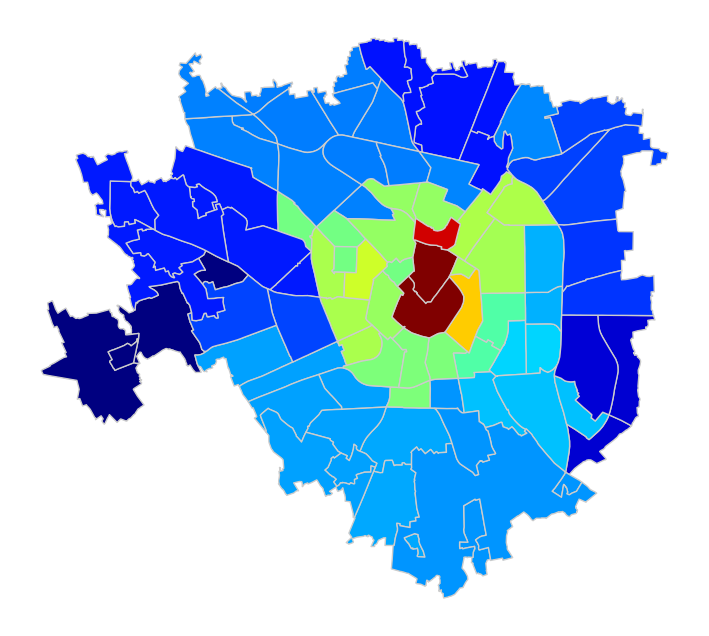

In [21]:
milano = gpd.read_file('~/Desktop/Project/milano1/milano_map.shp')

vmin = milano['Rent'].min()
vmax = milano['Rent'].max()
cmap = 'jet'
fig, ax = plt.subplots(1, figsize=(20, 8))
ax.axis('off')
milano.plot(column='Rent', ax=ax, edgecolor='0.8', linewidth=1, cmap=cmap)
